In [61]:
import operator
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

In [62]:
df = pd.read_csv(r"G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\dataset.csv")
df.head()

,x,y
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [63]:
x = df[['x']].values
y = df.y.values
x_train, x_val, y_train, y_val = train_test_split(x,y,train_size=0.75, random_state=1)

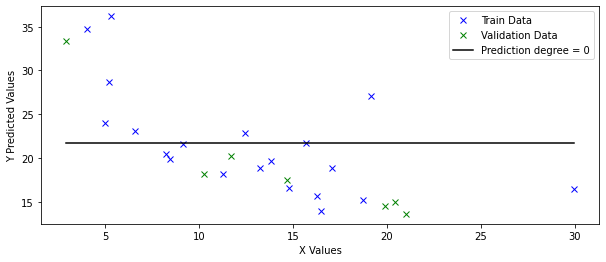

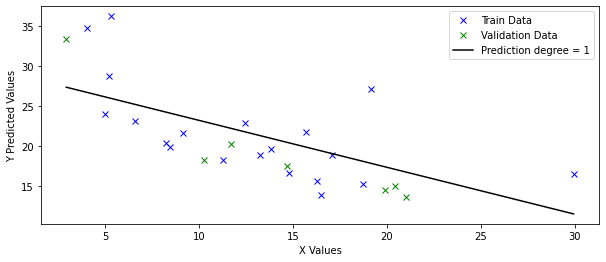

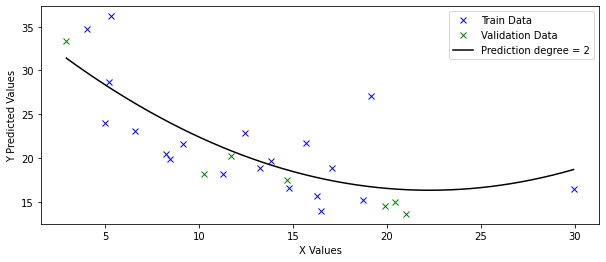

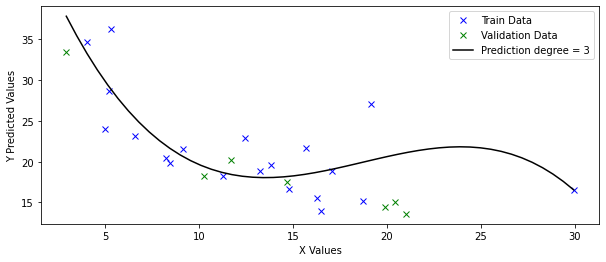

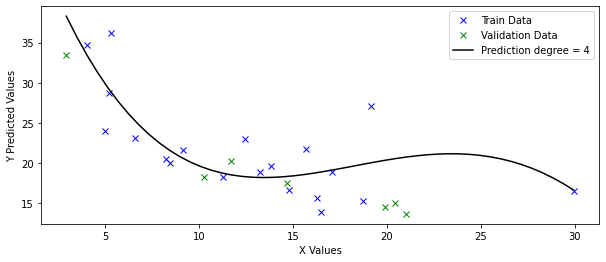

In [64]:
maxdeg = 5
training_error, validation_error = [],[]
for d in range(maxdeg):
    x_poly_train = PolynomialFeatures(degree = d).fit_transform(x_train)
    x_poly_val = PolynomialFeatures(degree = d).fit_transform(x_val)
    lreg = LinearRegression()
    lreg.fit(x_poly_train, y_train)
    y_train_pred = lreg.predict(x_poly_train)
    y_val_pred = lreg.predict(x_poly_val)
    training_error.append(mean_squared_error(y_train_pred, y_train))
    validation_error.append(mean_squared_error(y_val_pred, y_val))

    x1 = np.linspace(x.min(),x.max()).reshape(-1,1)
    y1 = lreg.predict(PolynomialFeatures(degree=d).fit_transform(x1))
    fig, ax = plt.subplots(figsize=(10,4))
    ax.plot(x_train,y_train,'bx', label="Train Data")
    ax.plot(x_val,y_val,'gx', label="Validation Data")
    ax.plot(x1, y1, 'k-', label=f"Prediction degree = {d}")
    ax.set_xlabel("X Values")
    ax.set_ylabel("Y Predicted Values")
    ax.legend()
plt.show()

In [65]:
min_mse = min(validation_error)
best_degree = validation_error.index(min_mse)

# Print the degree of the best model computed above
print("The best degree of the model is",best_degree)

The best degree of the model is 2


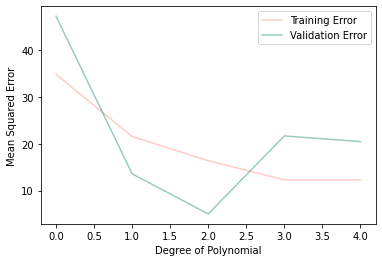

In [67]:
fig, ax = plt.subplots()

# Plot the training error with labels
ax.plot(training_error, color='#FF7E79', alpha=0.4, label='Training Error')

# Plot the validation error with labels
ax.plot(validation_error, color='#007D66', alpha=0.4, label='Validation Error')

# Set the plot labels and legends
ax.set_xlabel('Degree of Polynomial')
ax.set_ylabel('Mean Squared Error')
ax.legend(loc = 'best')
# ax.set_yscale('log')
plt.show()